<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем данные</a></span></li><li><span><a href="#Посмотрим-на-размер-датасета" data-toc-modified-id="Посмотрим-на-размер-датасета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Посмотрим на размер датасета</a></span></li><li><span><a href="#При-помощи-функции-next-получим-features-и-target-из-загруженных-данных" data-toc-modified-id="При-помощи-функции-next-получим-features-и-target-из-загруженных-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>При помощи функции <code>next</code> получим <code>features</code> и <code>target</code> из загруженных данных</a></span></li><li><span><a href="#Построим-график-распределения-возростов-в-нашей-выборке" data-toc-modified-id="Построим-график-распределения-возростов-в-нашей-выборке-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Построим график распределения возростов в нашей выборке</a></span></li><li><span><a href="#Посмотрим-на-концентрацию-данных-о-возрасте-при-помощи-графика-boxplot" data-toc-modified-id="Посмотрим-на-концентрацию-данных-о-возрасте-при-помощи-графика-boxplot-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Посмотрим на концентрацию данных о возрасте при помощи графика <code>boxplot</code></a></span></li><li><span><a href="#Выведем-12-фотографий-и-посмотрим-на-возможные-сложности,-которые-могут-возникнуть-при-их-обработке-нашей-моделью" data-toc-modified-id="Выведем-12-фотографий-и-посмотрим-на-возможные-сложности,-которые-могут-возникнуть-при-их-обработке-нашей-моделью-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Выведем <code>12</code> фотографий и посмотрим на возможные сложности, которые могут возникнуть при их обработке нашей моделью</a></span></li><li><span><a href="#Создадим-цикл-для-вывода-на-печать-фотографий-и-возраста" data-toc-modified-id="Создадим-цикл-для-вывода-на-печать-фотографий-и-возраста-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Создадим цикл для вывода на печать фотографий и возраста</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Код-обучения-модели-и-её-результат-вывода-на-экран." data-toc-modified-id="Код-обучения-модели-и-её-результат-вывода-на-экран.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Код обучения модели и её результат вывода на экран.</a></span><ul class="toc-item"><li><span><a href="#Результат-работы-модели-вывод-на-экран." data-toc-modified-id="Результат-работы-модели-вывод-на-экран.-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Результат работы модели вывод на экран.</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

---
# Определение возраста покупателей
---

## Исследовательский анализ данных

### Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### Загружаем данные

In [ ]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255.)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


### Посмотрим на размер датасета

In [ ]:
labels.shape

(7591, 2)

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


### При помощи функции `next` получим `features` и `target` из загруженных данных

In [ ]:
features, target = next(train_gen_flow)

In [ ]:
features.shape

(32, 224, 224, 3)

*В нашем расоряжении выборка с цветными фотографиями в количестве 7591 шт. и размером 224x224 разделённая на множество слоёв (батчей) по 32 тренировочных объекта в каждом. Таким образом если обучать весь датасет, то нам потребуется 237 итреаций на одну эпоху.*

### Построим график распределения возростов в нашей выборке

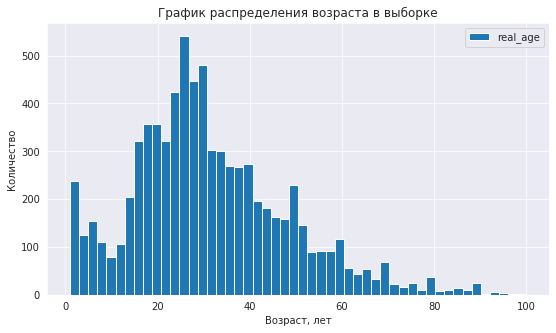

In [ ]:
sns.set_style("dark")
labels.plot(kind='hist',figsize=(9,5),bins=50, grid=True)
plt.title('График распределения возраста в выборке')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество')
plt.show()

### Посмотрим на концентрацию данных о возрасте при помощи графика `boxplot`

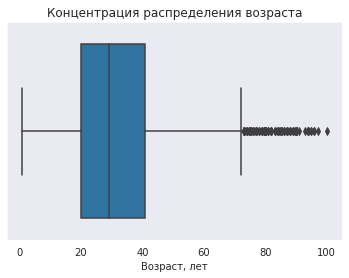

In [ ]:
sns.boxplot(labels["real_age"])
plt.title('Концентрация распределения возраста')
plt.xlabel('Возраст, лет')
plt.show()

### Выведем `12` фотографий и посмотрим на возможные сложности, которые могут возникнуть при их обработке нашей моделью

In [ ]:
labels.head(12)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


### Создадим цикл для вывода на печать фотографий и возраста

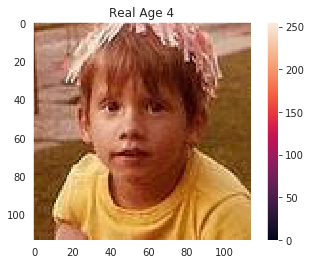

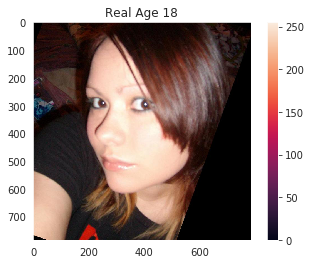

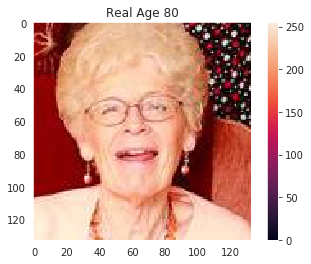

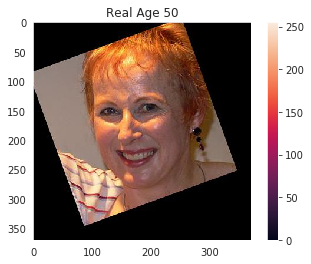

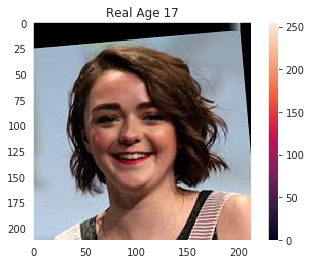

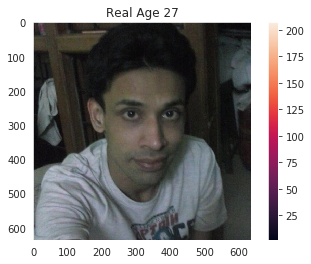

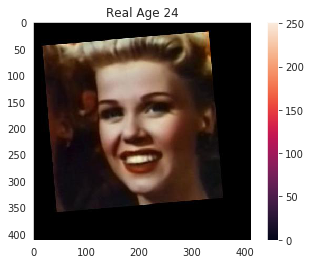

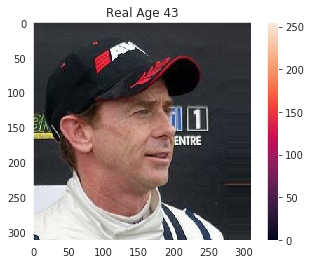

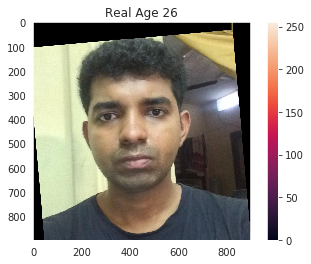

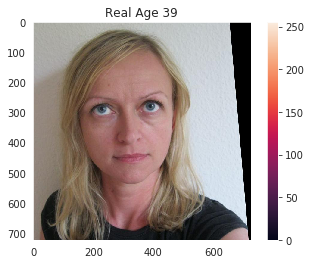

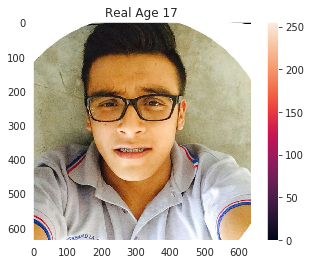

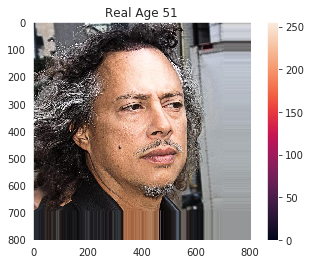

In [ ]:
for i,k in zip(labels.file_name[:12],labels.real_age[:12]):
    image = Image.open('/datasets/faces/final_files/'+i)
    array = np.array(image)
    plt.imshow(array)
    plt.title('Real Age {:.0f}'.format(k))
    plt.colorbar()
    plt.show()

### Вывод:
   В нашем распоряжении датасет с размеченными фотографиями в количестве $7591$шт и размером $224x224$, этого количества вполне достаточно для того, чтобы попробовать провести обучение нашей модели без заморозки основного слоя сети и избежать переобучения. Среди них много повернутых изображений по горизонтали(и поэтому мы должны добавить изображения с увеличенным вращением в тренировочную выборку), а также мы видим изображения в оттенках серого и красного, очень редко встречаются фото с размытием области. Такие фотографии конечно же усложнят работу модели по определению точного возраста, но подавляющее большинство фотографий всё же выполнено в нормальном цветовом спектре. Для фото с недостаточной яркостью применим дополнительный параметр по добавлению фото с пониженой яркостью в тренировочную выборку.
      <br>
      
   Судя по гистограмме распределения семплов мы можем увидеть нормальне распределение возростных данных со скосом вправо. При этом выделяются пиковые года в области юбилейных дат и знаковых порогов жизни, таких как: первого года жизни, 18 лет, 30 лет, 40, 60 и т.д. В нашем датасете мы имеем преобладающее большинство размеченных фотографий с возрастом от 20 до 40 лет с пиковым значением в 30 лет. Такое распределение связано с тем, что молодые люди до 30 лет ведут активный образ жизни, параллельно делая много разноплановых фотографий. Люди после 30 лет уже ведут более размеренную жизнь и ярких событий, которые хотетелось бы запечатлеть на фото, становится всё меньше. Соответственно наша модель будет давать более точные прогнозы на фотографиях людей в возрасте от 20 до 40 лет

----
## Обучение модели

### Код обучения модели и её результат вывода на экран.
(Код в этом разделе запускается в стороннем сервисе, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
import pandas as pd



def load_test(path):
    labels = pd.read_csv(path+'labels.csv') 
    test_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345) 
    return test_datagen_flow


def load_train(path):
    labels = pd.read_csv(path+'labels.csv') 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.25,
                                   horizontal_flip=True,
                                   brightness_range=(0.8, 1.))
 
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
      directory=path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='training',
      seed=12345)
    return train_datagen_flow
 
 
def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mae'])
    
    return model
 
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model
```

#### Результат работы модели вывод на экран.

```python
Train for 178 steps, validate for 60 steps
Epoch 1/10
2021-03-30 13:13:42.207011: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-03-30 13:13:42.511302: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 57s - loss: 211.7022 - mae: 10.5246 - val_loss: 541.1313 - val_mae: 18.1916
Epoch 2/10
178/178 - 49s - loss: 93.9800 - mae: 7.2959 - val_loss: 325.9918 - val_mae: 13.3463
Epoch 3/10
178/178 - 49s - loss: 72.5821 - mae: 6.4868 - val_loss: 307.5567 - val_mae: 13.0776
Epoch 4/10
178/178 - 49s - loss: 52.8272 - mae: 5.5437 - val_loss: 156.3203 - val_mae: 9.2769
Epoch 5/10
178/178 - 51s - loss: 40.4588 - mae: 4.8925 - val_loss: 101.1309 - val_mae: 7.4912
Epoch 6/10
178/178 - 51s - loss: 32.4918 - mae: 4.3454 - val_loss: 145.1432 - val_mae: 9.4843
Epoch 7/10
178/178 - 51s - loss: 25.4774 - mae: 3.8571 - val_loss: 70.6875 - val_mae: 6.2292
Epoch 8/10
178/178 - 50s - loss: 20.9523 - mae: 3.5319 - val_loss: 71.6292 - val_mae: 6.3329
Epoch 9/10
178/178 - 48s - loss: 20.7560 - mae: 3.4553 - val_loss: 79.6420 - val_mae: 6.9604
Epoch 10/10
178/178 - 49s - loss: 16.4964 - mae: 3.0844 - val_loss: 69.6689 - val_mae: 6.2520
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 69.6689 - mae: 6.2520
Test MAE: 6.2520

```

**Лучший результат MAE на тестовой выборке:** <font color='green'> $6.22$ </font>  **достигнут при $7$ эпохах обучения**
   

-----
## Анализ обученной модели

   Перед нами стояла задача построить и обучить модель, которя поможет определять возраст человека по изображению с камеры со средним абсолютным отклонением $MAE$ не выше $7$.<br>
   
   В нашем распоряжении был датасет с $7591$ размеченной фотографией, среди которых преимущественно были фотографии выполненные при слабом освещении и с вращением по горизонтальной оси. Для того, чтобы модель обучилась точнее мы предварительно отделив $75$% данных для тренировки модели, использовали специальные гиперпараметры, которые добавили в тренировочную выборку фотографии с похожими эффектами, а оставшиеся $25$% оставили без изменений для тестирования модели.<br>
   
   В качестве основы за модель взяли уже предобученную нейросеть с архитектурой $ResNet50$ и дополнительно обучили её на наших данных без замораживания. В выходном слое,для более точного обучения модели, использовали оптимизацию **Adam** c шагом обучения $0,0003$, а в качестве функции потерь использовалась *mean_squared_error*, что немного ускорило процесс обучения.<br>
   
<br>

 С такими параметрами мы протестировали нашу модель на $10$ **эпохах** и уже на $7$ **эпохе** обучения на тестовых данных, она достигла значения по метрике $MAE$ равное $6.22$, что существенно <u>меньше $7$</u>. Однако не смотря на то, что к $10$ **эпохе** значение $MAE$ на тренировочных данных улучшилось на $0.77$, на тестовых наоборот ухудшилось на $0.03$ дойдя до значения в $6.25$, это говорит о начале переобученя модели и мы можем ограничить модель $7$ **эпохами**, дополнительным плюсом это позволит на $30$% сократить время обучения модели.<br>
   
   Таким образом мы достигли требуемой точности предсказания возраста нашей моделью и смело можем рекомендовать её к использованию.